<a href="https://colab.research.google.com/github/Phillyprogramer215/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Copy_of_LS_DS_112_Make_Features_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [0]:
##### Begin Working Here #####

In [0]:
#imports
import pandas as pd
import numpy as np

In [14]:
# read in DataFrame
source_url = 'https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv'
iowa_df = pd.read_csv(source_url)
iowa_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
#shape
iowa_df.shape

(1460, 81)

In [16]:
#describe
iowa_df['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

In [17]:
#column types
pd.set_option('display.max_rows', 100)
iowa_df.dtypes[:7]

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
dtype: object

In [18]:
# Look at the first ten rows of the `BedroomAbvGr` column.
# Looks like integers to me!
iowa_df[['BedroomAbvGr', 'Fireplaces']].sample(10)

,BedroomAbvGr,Fireplaces
761,2,0
1096,3,0
1044,4,1
971,2,0
1299,3,0
613,3,0
1250,3,2
933,3,0
191,4,0
493,3,1


In [0]:
iowa_df['fire places are nice and hot']= iowa_df['Fireplaces']

In [20]:
iowa_df[['fire places are nice and hot', 'Fireplaces', 'BedroomAbvGr']].head(2)

,fire places are nice and hot,Fireplaces,BedroomAbvGr
0,0,0,3
1,1,1,3


In [21]:
iowa_df['LotFrontage'].head(2)

0    65.0
1    80.0
Name: LotFrontage, dtype: float64

In [22]:
#LotFrontage has 259 nan values
iowa_df['LotFrontage'].value_counts(dropna=False)

NaN      259
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 111, dtype: int64

In [23]:
type(np.nan)

float

In [24]:
#how much missing data
iowa_df['LotFrontage'].isnull().sum()

259

In [0]:
iowa_df['LotFrontage'].dropna(inplace=True)

In [26]:
#after dropping the nan values it drops down to 0
iowa_df['LotFrontage'].isnull().sum()

0

In [27]:
#making a smaller data frame using specific columns

small_df = iowa_df[['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'SalePrice']].copy()
small_df.sample(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice
523,3138,3138,1538,184750
1324,1795,1795,0,147000
512,864,864,0,129900


In [28]:
#adding a new column with the total square footage
small_df['TotalSF'] = small_df['TotalBsmtSF']+ small_df['1stFlrSF'] + small_df['2ndFlrSF']
small_df.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF
0,856,856,854,208500,2566
1,1262,1262,0,181500,2524
2,920,920,866,223500,2706


In [29]:
# adding a new column with the price per square foot
small_df['PricePerSF']= small_df['SalePrice'] / small_df['TotalSF']
small_df.head(3)

,TotalBsmtSF,1stFlrSF,2ndFlrSF,SalePrice,TotalSF,PricePerSF
0,856,856,854,208500,2566,81.254871
1,1262,1262,0,181500,2524,71.909667
2,920,920,866,223500,2706,82.594235


In [30]:
#printing the columns
iowa_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [31]:
#what are some categorical columns
iowa_df[['LotShape', 'Alley', 'Street', 'SaleCondition']].head()

,LotShape,Alley,Street,SaleCondition
0,Reg,NaN,Pave,Normal
1,Reg,NaN,Pave,Normal
2,IR1,NaN,Pave,Normal
3,IR1,NaN,Pave,Abnorml
4,IR1,NaN,Pave,Normal


In [32]:
iowa_df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [33]:
#create a new categorical variable
iowa_df['NormalCondition']= np.where(iowa_df['SaleCondition']=='Normal', 'yes', 'no')
iowa_df['NormalCondition'].value_counts()

yes    1198
no      262
Name: NormalCondition, dtype: int64

In [34]:
#value counts of a categorical variable
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [0]:
#map down from 4 to 3
iowa_df['LotShape3']= iowa_df['LotShape'].map({'Reg': 'Regular',
                                               'IR1': 'Irregular',
                                               'IR2': 'Other',
                                               'IR3': 'Other'})

In [36]:
iowa_df['LotShape3'].value_counts()

Regular      925
Irregular    484
Other         51
Name: LotShape3, dtype: int64

In [37]:
iowa_df['LotShape'].value_counts()

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [38]:
iowa_df['Neighborhood'].value_counts().head(6)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
Name: Neighborhood, dtype: int64

In [39]:
iowa_df['Top_neighbors'] = 'All others'
iowa_df.loc[iowa_df['Neighborhood']=='NAmes', 'Top_neighbors']= 'North Ames Neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='CollgCr', 'Top_neighbors']= 'Creek Neighbors'
iowa_df.loc[iowa_df['Neighborhood']=='Gilbert', 'Top_neighbors']= 'Gilbert Neighbors'
iowa_df['Top_neighbors'].value_counts()

All others              1006
North Ames Neighbors     225
Creek Neighbors          150
Gilbert Neighbors         79
Name: Top_neighbors, dtype: int64

In [40]:
#crosstabs
pd.crosstab(iowa_df['Top_neighbors'], iowa_df['LotShape3'])

LotShape3,Irregular,Other,Regular
Top_neighbors,,,
All others,312,27,667
Creek Neighbors,53,11,86
Gilbert Neighbors,53,11,15
North Ames Neighbors,66,2,157


In [41]:
#margins
pd.crosstab(iowa_df['Top_neighbors'], iowa_df['LotShape3'], margins=True)

LotShape3,Irregular,Other,Regular,All
Top_neighbors,,,,
All others,312,27,667,1006
Creek Neighbors,53,11,86,150
Gilbert Neighbors,53,11,15,79
North Ames Neighbors,66,2,157,225
All,484,51,925,1460


In [42]:
# as proportions
pd.crosstab(iowa_df['Top_neighbors'], iowa_df['LotShape3'], normalize='index', margins=True)

LotShape3,Irregular,Other,Regular
Top_neighbors,,,
All others,0.310139,0.026839,0.663022
Creek Neighbors,0.353333,0.073333,0.573333
Gilbert Neighbors,0.670886,0.139241,0.189873
North Ames Neighbors,0.293333,0.008889,0.697778
All,0.331507,0.034932,0.633562


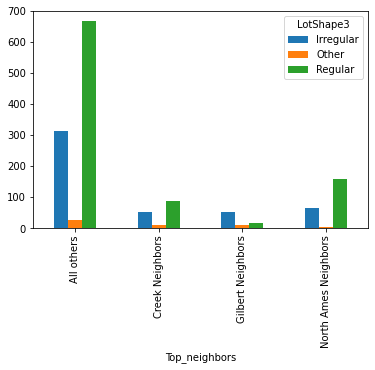

In [43]:
#display that
myresults = pd.crosstab(iowa_df['Top_neighbors'], iowa_df['LotShape3'])
myresults.plot(kind= 'bar');

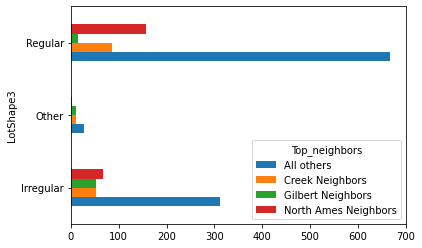

In [44]:
# Flip that
myresults2 = pd.crosstab(iowa_df['LotShape3'], iowa_df['Top_neighbors'])
myresults2.plot(kind='barh');

In [45]:
! wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2020-03-17 00:03:46--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [      <=>           ]  21.71M  1.63MB/s    in 14s     

2020-03-17 00:04:00 (1.55 MB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22763850]



In [46]:
! unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [47]:
# read in the csv
loan_df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')
loan_df.head(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,10000,10000,10000.0,60 months,16.14%,243.93,C,C4,Sale Consultant,2 years,RENT,90000.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,079xx,NJ,8.80,0,Mar-1991,1,NaN,43.0,11,1,10582,58.5%,32,w,0.00,0.00,10661.057727,10661.06,...,80.0,1,0,25600,15470,15000,7500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,6500,6500,6500.0,36 months,11.80%,215.28,B,B4,Educator,2 years,RENT,46500.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,21.01,0,Aug-2011,1,61.0,NaN,24,0,6741,41.6%,30,w,4411.89,4411.89,2792.250000,2792.25,...,0.0,0,0,50845,40223,13300,34645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4500,4500,4500.0,36 months,11.31%,147.99,B,B3,Accounts Examiner III,10+ years,RENT,38500.0,Not Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,786xx,TX,4.64,0,Dec-2003,0,25.0,NaN,12,0,4472,15.3%,25,w,0.00,0.00,4549.217149,4549.22,...,0.0,0,0,53795,29137,15100,24595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.050000,5848.05,...,10.0,0,0,179321,95648,62800,91424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,27.27%,920.91,E,E5,Claims Analyst,1 year,RENT,50000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,857xx,AZ,23.62,0,Dec-1997,1,NaN,NaN,10,0,1258,10.7%,16,w,26429.58,26429.58,11903.650000,11903.65,...,0.0,0,0,46300,27364,10100,34500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,10000,10000,10000.0,36 months,16.14%,352.27,C,C4,Training Manager,10+ years,MORTGAGE,94800.0,Source Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,325xx,FL,28.59,0,Jan-2009,1,NaN,NaN,18,0,49976,65.8%,37,w,6928.87,6928.87,4566.060000,4566.06,...,33.3,0,0,415969,95754,24100,71489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,25000,25000,25000.0,60 months,12.98%,568.58,B,B5,Tire builder,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2

In [48]:
# We can fix the header problem by using the 'skiprows' parameter
loans_df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
loans_df.tail(7)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
128277,NaN,NaN,5000,5000,5000.0,36 months,16.14%,176.14,C,C4,Oncology Medical Assistant,3 years,MORTGAGE,46400.0,Source Verified,Oct-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,338xx,FL,16.85,0,Nov-2003,0,29.0,NaN,10,0,6722,62.2%,18,w,0.00,0.00,5436.02672,5436.03,...,100.0,0,0,161585,19979,3000,14875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128278,NaN,NaN,5600,5600,5600.0,36 months,13.56%,190.21,C,C1,NaN,NaN,RENT,15600.0,Not Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,836xx,ID,15.31,0,Aug-2012,0,NaN,97.0,9,1,5996,34.5%,11,w,3387.58,3387.58,3032.81000,3032.81,...,25.0,1,0,17400,5996,8600,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128279,NaN,NaN,23000,23000,23000.0,36 months,15.02%,797.53,C,C3,Tax Consultant,10+ years,MORTGAGE,75000.0,Source Verified,Oct-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,352xx,AL,20.95,1,Aug-1985,2,22.0,NaN,12,0,22465,43.6%,28,w,0.00,0.00,1547.08000,1547.08,...,14.3,0,0,296500,40614,47100,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128280,NaN,NaN,10000,10000,10000.0,36 months,15.02%,346.76,C,C3,security guard,5 years,MORTGAGE,38000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,443xx,OH,13.16,3,Jul-1982,0,6.0,NaN,11,0,5634,37.1%,16,w,6101.42,6101.42,5539.82000,5539.82,...,40.0,0,0,91403,9323,9100,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128281,NaN,NaN,5000,5000,5000.0,36 months,13.56%,169.83,C,C1,Payoff Clerk,10+ years,MORTGAGE,35360.0,Not Verified,Oct-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,381xx,TN,11.30,1,Jun-2006,0,21.0,NaN,9,0,2597,27.3%,15,f,3024.63,3024.63,2713.51000,2713.51,...,50.0,0,0,93908,4976,3000,6028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128282,NaN,NaN,10000,10000,9750.0,36 months,11.06%,327.68,B,B3,NaN,NaN,RENT,44400.0,Source Verified,Oct-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,980xx,WA,11.78,0,Oct-2008,2,40.0,NaN,15,0,6269,13.1%,25,f,5959.76,5810.77,5227.52000,5096.83,...,0.0,0,0,57871,16440,20500,10171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
128283,NaN,NaN,10000,10000,10000.0,36 months,16.91%,356.08,C,C5,Key Accounts Manager,2 years,RENT,80000.0,Not Verified,Oct-20

In [49]:
pd.set_option('display.max_rows', 100)
loans_df.isnull().sum().sort_values(ascending=False)

id                                            128284
desc                                          128284
member_id                                     128284
url                                           128284
orig_projected_additional_accrued_interest    128025
                                               ...  
inq_last_12m                                       0
acc_open_past_24mths                               0
chargeoff_within_12_mths                           0
delinq_amnt                                        0
inq_fi                                             0
Length: 144, dtype: int64

In [50]:
loans_df['int_rate'].head(10)

0     16.14%
1     11.80%
2     11.31%
3     14.47%
4     27.27%
5     16.14%
6     12.98%
7     10.33%
8     23.40%
9     10.72%
Name: int_rate, dtype: object

In [51]:
# look at a specific value of int_rate
loans_df['int_rate'][3]

' 14.47%'

In [52]:
type(loans_df['int_rate'][3])

str

In [0]:
# lets start by fixing a single string
Int_rate = ' 14.47%'

In [54]:
Int_rate.strip()

'14.47%'

In [55]:
Int_rate.strip('%')

' 14.47'

In [56]:
#remove both the space and the percent sign
Int_rate.strip().strip('%')

'14.47'

In [57]:
# 'Cast' the string into a float
float('14.47')

14.47

In [58]:
# put it all together
float(Int_rate.strip().strip('%'))

14.47

In [59]:
# check your work
type(float(Int_rate.strip().strip('%')))

float

In [0]:
#making a reusable function
def myfunc(cell_contents):
  return float(Int_rate.strip().strip('%'))

In [61]:
myfunc(Int_rate)

14.47

In [62]:
type(myfunc(Int_rate))

float

In [0]:
#apply our solution to every cell in a column
new_list = []

In [0]:
#for loop
for cell in loans_df['int_rate']:
  new_list.append(myfunc(cell))

In [65]:
new_list[:10]

[14.47, 14.47, 14.47, 14.47, 14.47, 14.47, 14.47, 14.47, 14.47, 14.47]

In [66]:
#compare to the original 
list(loans_df['int_rate'][:10])

[' 16.14%',
 ' 11.80%',
 ' 11.31%',
 ' 14.47%',
 ' 27.27%',
 ' 16.14%',
 ' 12.98%',
 ' 10.33%',
 ' 23.40%',
 ' 10.72%']

In [67]:
loans_df['int_rate']

0          16.14%
1          11.80%
2          11.31%
3          14.47%
4          27.27%
           ...   
128279     15.02%
128280     15.02%
128281     13.56%
128282     11.06%
128283     16.91%
Name: int_rate, Length: 128284, dtype: object

In [68]:
loans_df['int_rate_cleaned'] = pd.Series(new_list)
loans_df[['int_rate', 'int_rate_cleaned']].head()

,int_rate,int_rate_cleaned
0,16.14%,14.47
1,11.80%,14.47
2,11.31%,14.47
3,14.47%,14.47
4,27.27%,14.47


In [69]:
loans_df['int_rate_cleaned_X'] = new_list
loans_df[['int_rate', 'int_rate_cleaned_X']].head()

,int_rate,int_rate_cleaned_X
0,16.14%,14.47
1,11.80%,14.47
2,11.31%,14.47
3,14.47%,14.47
4,27.27%,14.47


In [70]:
loans_df[['int_rate', 'int_rate_cleaned_X']].dtypes

int_rate               object
int_rate_cleaned_X    float64
dtype: object

In [71]:
loans_df['int_rate_cleaned2'] = loans_df['int_rate'].apply(myfunc)
loans_df[['int_rate', 'int_rate_cleaned_X', 'int_rate_cleaned2']].head()

,int_rate,int_rate_cleaned_X,int_rate_cleaned2
0,16.14%,14.47,14.47
1,11.80%,14.47,14.47
2,11.31%,14.47,14.47
3,14.47%,14.47,14.47
4,27.27%,14.47,14.47


In [72]:
# top 20 rows
loans_df['emp_title'].head(20)

0                      Sale Consultant
1                            Educator 
2                Accounts Examiner III
3                              teacher
4                       Claims Analyst
5                     Training Manager
6                         Tire builder
7                               Driver
8                               BANKER
9                     Business Analyst
10                            OPERATOR
11                    Shift Supervisor
12          Program Support Assistant 
13              Reference/YA Librarian
14                      Senior manager
15    Sr. Vice President -Risk Manager
16                                 NaN
17                         Haz Mat S/R
18                       Especialist 1
19                            Shipping
Name: emp_title, dtype: object

In [76]:
loans_df['emp_title'].value_counts(dropna=False)[:20]

NaN                   20922
Teacher                2088
Manager                1771
Registered Nurse        950
Driver                  924
RN                      724
Supervisor              697
Sales                   580
Project Manager         526
General Manager         523
Office Manager          520
Owner                   420
Director                402
Operations Manager      387
Truck Driver            387
Nurse                   326
Engineer                325
Sales Manager           304
manager                 301
Supervisor              270
Name: emp_title, dtype: int64

In [77]:
# How many different unique employment titles are there currently?
len(loans_df['emp_title'].unique())

43852

In [78]:
#another way
loans_df['emp_title'].nunique()

43851

In [79]:
# How often is the employment_title null?
loans_df['emp_title'].isnull().sum()

20922

In [0]:
# Create some examples that represent the cases that we want to clean up
examples = ['owner', 'Supervisor', ' Project Manager', np.nan]

In [81]:
# do that same function in individual steps
print(type('Supervisor'))
isinstance('Supervisor', str)

<class 'str'>


True

In [82]:
# what about the strip?
' superVIsor'.title().strip()

'Supervisor'

In [0]:
# Write a function to clean up these use cases and increase uniformity.
def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "unknown"

In [84]:
# test our function
clean_title(' superVIsor')

'Supervisor'

In [85]:
# create a for loop:
mylist = []
for jobtitle in examples:
  mylist.append(clean_title(jobtitle))
mylist

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [86]:
# list comprehensions can combine function calls and for loops over lists
# into one succinct and fairly readable single line of code.
[clean_title(jobtitle) for jobtitle in   examples]

['Owner', 'Supervisor', 'Project Manager', 'unknown']

In [0]:
# We have a function that works as expected. Lets apply it to our column.
# This time we'll overwrite the original column

loans_df['emp_title_cleaned'] = loans_df['emp_title'].apply(clean_title)

In [88]:
# check our work
loans_df[['emp_title', 'emp_title_cleaned']].sample(10)

,emp_title,emp_title_cleaned
98590,Respiratory Therapist,Respiratory Therapist
76698,STAFF REGISTERED NURSE,Staff Registered Nurse
13577,Security Officer,Security Officer
74587,NaN,unknown
57612,Elementary Principal,Elementary Principal
11665,server,Server
9024,NaN,unknown
23899,Transportation Supervisor,Transportation Supervisor
57235,NaN,unknown
39688,Dietary Aide,Dietary Aide


In [89]:
# Look at the top 20 employment titles
loans_df['emp_title_cleaned'].value_counts().head(8)

unknown             20922
Teacher              2553
Manager              2393
Registered Nurse     1416
Driver               1258
Supervisor           1160
Truck Driver          920
Rn                    832
Name: emp_title_cleaned, dtype: int64

In [90]:
# How many different unique employment titles are there currently?
loans_df['emp_title_cleaned'].nunique()

34877

In [91]:
# recoding a categorical
loans_df['new_emp_title']='All others'
loans_df.loc[loans_df['emp_title']=='Manager','new_emp_title' ]='Manager'
loans_df.loc[loans_df['emp_title']=='Teacher','new_emp_title' ]='Teacher'
loans_df['new_emp_title'].value_counts()

All others    124425
Teacher         2088
Manager         1771
Name: new_emp_title, dtype: int64

In [92]:
# How often is the employment_title null (NaN)?
loans_df['emp_title_cleaned'].isnull().sum()

0

In [93]:
# list all columns
loans_df.columns[:30]

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record'],
      dtype='object')

In [94]:
# check out one column
loans_df['issue_d'].head()

0    Dec-2018
1    Dec-2018
2    Dec-2018
3    Dec-2018
4    Dec-2018
Name: issue_d, dtype: object

In [95]:
mylist = []
for col in loans_df.columns:
  if col.endswith('_d'):
    mylist.append(col)
mylist

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [0]:
# as a list comprehension:
my_date_cols = [col for col in loans_df.columns if col.endswith('_d')]

In [97]:
loans_df['issue_d'].dtype

dtype('O')

In [98]:
print(loans_df['issue_d'][0])
type(loans_df['issue_d'][0])

Dec-2018


str

In [99]:
loans_df['new_issue_d'] = pd.to_datetime(loans_df['issue_d'], infer_datetime_format=True)

loans_df[['issue_d','new_issue_d']]

,issue_d,new_issue_d
0,Dec-2018,2018-12-01
1,Dec-2018,2018-12-01
2,Dec-2018,2018-12-01
3,Dec-2018,2018-12-01
4,Dec-2018,2018-12-01
...,...,...
128279,Oct-2018,2018-10-01
128280,Oct-2018,2018-10-01
128281,Oct-2018,2018-10-01
128282,Oct-2018,2018-10-01


In [100]:
type(loans_df['new_issue_d'][0])

print(loans_df['new_issue_d'].dtype)

datetime64[ns]


In [101]:
loans_df['new_issue_d'].iloc[0]

Timestamp('2018-12-01 00:00:00')

In [102]:
loans_df['new_issue_d'].head().values

array(['2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2018-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [103]:
loans_df['year'] = loans_df['new_issue_d'].dt.year
loans_df[['issue_d', 'new_issue_d', 'year']].sample(7)

,issue_d,new_issue_d,year
56394,Nov-2018,2018-11-01,2018
47703,Nov-2018,2018-11-01,2018
37940,Dec-2018,2018-12-01,2018
77296,Nov-2018,2018-11-01,2018
110824,Oct-2018,2018-10-01,2018
35650,Dec-2018,2018-12-01,2018
21372,Dec-2018,2018-12-01,2018


In [104]:
loans_df['month'] = loans_df['new_issue_d'].dt.month
loans_df[['issue_d', 'new_issue_d', 'year', 'month']].sample(7)

,issue_d,new_issue_d,year,month
29341,Dec-2018,2018-12-01,2018,12
70757,Nov-2018,2018-11-01,2018,11
108437,Oct-2018,2018-10-01,2018,10
122507,Oct-2018,2018-10-01,2018,10
27402,Dec-2018,2018-12-01,2018,12
69985,Nov-2018,2018-11-01,2018,11
74621,Nov-2018,2018-11-01,2018,11


In [105]:
loans_df['weekday'] = loans_df['new_issue_d'].dt.weekday
loans_df[['issue_d', 'new_issue_d', 'year', 'month', 'weekday']].sample(7)

,issue_d,new_issue_d,year,month,weekday
6494,Dec-2018,2018-12-01,2018,12,5
97794,Oct-2018,2018-10-01,2018,10,0
122650,Oct-2018,2018-10-01,2018,10,0
34543,Dec-2018,2018-12-01,2018,12,5
126037,Oct-2018,2018-10-01,2018,10,0
121497,Oct-2018,2018-10-01,2018,10,0
96168,Oct-2018,2018-10-01,2018,10,0


In [106]:
loans_df['new_last_credit_pull_d'] = pd.to_datetime(loans_df['last_credit_pull_d'])
loans_df[['last_credit_pull_d','new_last_credit_pull_d']].head() 

,last_credit_pull_d,new_last_credit_pull_d
0,Dec-2019,2019-12-01
1,Jan-2020,2020-01-01
2,Feb-2020,2020-02-01
3,Jan-2020,2020-01-01
4,Jan-2020,2020-01-01


In [0]:
# date arithmetic
loans_df['day_diff'] =  loans_df['new_issue_d'] - loans_df['new_last_credit_pull_d']

In [108]:
# check that out
loans_df[['issue_d', 'last_credit_pull_d', 'day_diff']]

,issue_d,last_credit_pull_d,day_diff
0,Dec-2018,Dec-2019,-365 days
1,Dec-2018,Jan-2020,-396 days
2,Dec-2018,Feb-2020,-427 days
3,Dec-2018,Jan-2020,-396 days
4,Dec-2018,Jan-2020,-396 days
...,...,...,...
128279,Oct-2018,Nov-2018,-31 days
128280,Oct-2018,Jan-2020,-457 days
128281,Oct-2018,Jan-2020,-457 days
128282,Oct-2018,Jan-2020,-457 days


In [109]:
loans_df['day_diff'].value_counts().sort_index().tail()

-30 days     89
0 days      514
30 days      80
31 days      33
61 days       1
Name: day_diff, dtype: int64

In [110]:
loans_df['day_diff'].describe()

count                        128283
mean     -412 days +12:30:45.083088
std         70 days 13:50:06.866943
min             -488 days +00:00:00
25%             -457 days +00:00:00
50%             -426 days +00:00:00
75%             -396 days +00:00:00
max                61 days 00:00:00
Name: day_diff, dtype: object

# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01